# 1. Descripción del problema

El problema a tratar en este informe es un problema de optimización de **búsqueda dentro de un árbol binario**. El problema consiste en minimizar el tiempo de búsqueda dentro de un árbol binario en el cual cada clave asociada a un nodo de este tiene una cierta probabilidad de ser buscado. Esto se logra posicionando las claves de tal forma dentro del árbol, que al querer buscar una clave $k$ con una probabilidad $p_k$ dentro de este, el tiempo sea el menor posible.

Finalmente es necesario detallar que el tiempo de búsqueda dentro de un árbol binario está dado por la cantidad de nodos que se deben visitar para llegar a la clave buscada, esto se le llama su **costo esperado**.

**Entrada:** Conjunto ordenado de claves $K = [k_1, k_2, ..., k_n]$, las cuales tienen una probabilidad asociada en otro conjunto de probabilidades $P = [p_{k1}, p_{k2}, ..., p_{kn}]$. Adicionalmente se agrega también un conjunto adicional de probabilidades de "búsquedas fallidas" $D = [d_{k1}, d_{k2}, ..., d_{kn}]$, de claves que no se encuentran en el conjunto inicial.

**Salida**: Mínimo valor de costo esperado/cantidad de nodos visitados por búsqueda.

**Tamaño del problema:** El tamaño para este problema viende definido por la cantidad de claves $k$ que se entregan inicialmente, debido a que mientras mayor cantidad de claves, se deben evaluar más opciones de árboles óptimos con una mayor cantidad de probabilidades.


<a href="https://imgur.com/Y1WqzqK"><img src="https://i.imgur.com/Y1WqzqK.jpg" title="source: imgur.com" /></a>

A lo largo de este informe, se revisarán dos opciones de algoritmo para llegar a la solución final esperada. En primer lugar una opción mediante un algoritmo **recursivo**, y en segundo, un algoritmo que utilice el paradigma de **programación dinámica**.

# 2. Algoritmos


## 2.1 Opción recursiva

### 2.1.1 Descripción

Esta opción, de manera parecida a otros algoritmos que se han revisado, utiliza una **función recursiva** para resolver el problema, es decir que propone casos base del problema, y para los otros casos aplica sobre estos el mismo algoritmo. Esto para llegar finalmente a la solución buscada.

**Entrada:** Arreglo ordenado de claves  $K = [k_1, k_2, ..., k_n]$, arreglo de probabilidades $P = [p_{k1}, p_{k2}, ..., p_{kn}]$, cuyo índice corresponde a la probabilidad de cada clave $k$, arreglo de probabilidades $D = [d_{k1}, d_{k2}, ..., d_{kn}]$ de búsquedas fallidas.

**Salida:** Mínimo costo esperado encontrado.  

Para este problema, el algoritmo de resolución consiste en crear distintos árboles de búsqueda cuya diferencia radica en la raíz principal de ellos. Esto es debido a que a pesar de tener información de las probabilidades de búsqueda, no se puede asegurar que al colocar una cierta clave $k$ como raíz, siendo esta la con mayor probabilidad de ser buscada, eso asegure que el resto del árbol también será construido de manera óptima, minimizando así su coste. 

Es por esto que es necesario analizar todas las posibles raíces e ir construyendo los sub-árboles de manera óptima, para así quedarnos con el menor de los costes encontrados.

Debido a los pasos anteriormente mencionados, es que se desprende esta opción recursiva de la solución al problema, la cual consiste en los siguientes pasos:

1. Se realiza la suma entre dos sumatorias, una correspondiente a las probabilidades de las claves pertenecientes al árbol/sub-árbol que se está analizando, junto con la sumatoria de las probabilidades de búsqueda fallida.

2. Se escoge secuencialmente una clave $k$ para definirla como raíz.

3. Se aplica recursivamente al algoritmo para dos sub-árboles,el primero considera las claves anteriores a la raíz y el segundo las posteriores.

4. Se retorna el mínimo coste encontrado en los sub-árboles más la suma de las probabilidades calculadas en el paso 1.

### 2.1.2 Código

In [104]:
cont = 0

def optCost(freq, dummies, i, j):
    global cont

    cont += 1
    # Caso base
    if j < i:     
        return dummies[i]

    # Suma de probabilidades y dummies
    fsum = Sum(freq, dummies, i, j)
     
    # Mínimo valor encontrado
    Min = 999999999999
     
    # Se prueba cada raíz posible, se calcula recursivamente el coste de cada sub-árbol
    # Se compara el coste encontrado con el valor mínimo encontrado
    # Se reemplaza en caso de ser encontrado

    raiz = 0

    for r in range(i, j + 1):
        cost = (optCost(freq, dummies, i, r - 1) + optCost(freq, dummies, r + 1, j))
        if cost < Min:
            raiz = r
            Min = cost
     
    # Retorna minimo coste encontrado
    return Min + fsum
 
def Sum(freq, dummies, i, j):
    a = 0
    b = 0
    for k in range(i, j + 1): #Suma de probabilidades
      a += (freq[k])
    for k in range(i-1, j + 1): #Suma de dummies
      b += (dummies[k+1])
    return a + b

keys = [1, 2, 3, 4, 5]
freq = [0.15, 0.10, 0.05, 0.10, 0.20]
dummies = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
n = len(freq)
print("El coste del árbol de búsqueda óptimo es:", optCost(freq, dummies, 0, n-1))
print("Cantidad de llamadas recursivas: ", cont)

El coste del árbol de búsqueda óptimo es: 2.75
Cantidad de llamadas recursivas:  243


Las variables relevantes son:

* `i y j`, las cuales almacenan los límites de cada árbol/sub-árbol
* `fsum`, que almacenará la suma entre sumatorias de probabilidades reales y fallidas.
*`min`, que almacena el valor mínimo encontrado.
*`r`, presente en el ciclo `for`, servirá para ir probando las opciones de raíces para el árbol.
*`cost`, almacenará la suma de costes de los sub-árboles izquierdo y derecho.


### 2.1.3 Ejemplo

Para el ejemplo utilizado en el código anteriormente mencionado, se entrega a la función una lista de las $5$ claves iniciales: `[1,2,3,4,5]`, junto con una lista de probabilidades para las claves: `[0.15, 0.10, 0.05, 0.10, 0.20]`, adicionalmente a esto se entrega una lista de probabilidades de búsqueda fallida compuesta por los siguientes valores: `[0.05, 0.10, 0.05, 0.05, 0.05, 0.10]`.

Así, el algoritmo nos retorna que el mínimo coste posible es de $2.75$, el cual se consigue con una disposición de árbol representada en la siguiente imagen:

<a href="https://imgur.com/sHfHK5m"><img src="https://i.imgur.com/sHfHK5m.jpg" title="source: imgur.com" /></a>

Para calcular manualmente el coste del árbol basta con multiplicar cada probabilidad de cada clave real o ficticia por el nivel en el cual se encuentra en el árbol (comenzando por 1) y sumarlas entre todas, lo cual nos dará un coste de $2.75$.

## 2.2 Opción con programación dinámica bottom-up



### 2.2.1 Descripción



Para esta opción, se aplicará el paradigma de **programación dinámica**, el cual consiste en dividir un problema de tamaño $n$, en una cierta cantidad de sub-problemas de tamaño $m < n$, los cuales deberían ser relativamente más "fáciles" de solucionar que el problema original. Posteriormente  se almacenan las resoluciones de cada uno de estos en una tabla, la cual es consultada cuando para resolver un sub-problema $a$ sea necesario un resultado de un sub-problema $b$ previamente calculado. 

De esta manera estos algoritmos son más eficientes en tiempo que los algoritmos recursivos, que tienden a ser peores en rendimiento cuando los problemas se **traslapan**, es decir que comparten resoluciones.

Adicionalmente a esto, se tiene que esta segunda opción utiliza la programación dinámica con una planificación **bottom-up**, es decir que va solucionando los problemas de menor tamaño, y guarda sus resoluciones para que sean ocupadas para resolver los sub-problemas de mayor tamaño.

Para este problema en específico la cantidad de sub-problemas a resolver depende de la cantidad de elementos que se consideren para armar distintos sub-árboles. 

Lo anterior es debido a la lógica de que en un árbol se elije una raíz, y a partir de ella se generan dos sub-árboles, el sub-árbol izquierdo, con valores menores a la raíz, y el derecho, con valores mayores a esta. 

Es utilizando esta lógica que el algoritmo calcula el coste óptimo de árboles de rango y tamaño pequeños, hasta llegar al rango y tamaño deseado en el problema, almacenando estos valores en una matriz. El cálculo del valor óptimo se logra mediante los siguientes pasos:

1. Se crea la matriz de costes y la matriz de sumas de probabilidades ficticias y reales.
2. Se define un intervalo de números a calcularle el costo óptimo, empezando por un intervalo de solo un elemento, hasta un intervalo de $n$ elementos.

3. Se calcula la suma de probabilidades reales más ficticias y se guarda en la matriz auxiliar de probabilidades.

4. Se realiza un `for`para probar los candidatos a raíz, sumando los resultados obtenidos para sub-árboles más pequeños (previamente almacenados en la matriz auxiliar de costes) junto con la suma de probabilidades calculada en el paso 3.

5. Se guarda el menor resultado obtenido en el paso 4.

6. Se retorna el elemento de la matriz de costes que se encuentra en la posición $[0,n]$, el cual representa el coste óptimo encontrado en un intervalo de $0$ a $n$ elementos, que es lo que se estaba buscando en primera instancia.


### 2.2.2 Código

In [81]:
import numpy as np
import math
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

nullnodes=0

def generate_binary_tree(T,A,pivotes, i, j):
    global nullnodes

    if len(A)==1: 
      T.add_node(A[0])
      T.add_edge(A[0],"d"+str(nullnodes)); nullnodes+=1
      T.add_edge(A[0],"d"+str(nullnodes)); nullnodes+=1
      return A[0]

    pivote = (pivotes[i,j])-1-i

    T.add_node(A[pivote])

    if pivote > 0:
      left_node = generate_binary_tree(T,A[0:pivote], pivotes, pivote,len(A[0:pivote])+1)
      T.add_edge(A[pivote],left_node)
    elif pivote == 0: 
      T.add_edge(A[pivote],"d"+str(nullnodes)); nullnodes+=1
      
    if pivote < len(A)-1:
      right_node = generate_binary_tree(T,A[pivote+1:], pivotes, pivote+1, len(A[pivote+1:])+1)
      T.add_edge(A[pivote],right_node)
    else: 
      T.add_edge(A[pivote],"d"+str(nullnodes)); nullnodes+=1

    return A[pivote]

def optimalBST(keys,freq,dummies,n, visualize = False):
    subProblemas = 0

    e = np.zeros((n+1)**2).reshape(n+1,n+1)     # Matriz para guardar costes
    w = np.zeros((n+1)**2).reshape(n+1,n+1)     # Matriz para guardar sumatorias de probabilidades
    root = np.zeros((n+1)**2).reshape(n+1,n+1)  # Matriz para guardar raíces óptimas encontradas

    # Inicialización de matrices
    for i in range(n+1):
      # Se guardan las probabilidades dummie en los casos para 0 elementos
        e[i,i] = dummies[i]  
        w[i,i] = dummies[i]  
    for i in range(0,n):
      # Se guardan las raíces para los casos con de 0 elementos
        root[i,i] = i+1

    for l in range(1,n+1):
        subProblemas += 1
        for i in range(0, n-l+1):
            j = i+l
            min_ = math.inf
            w[i,j] = w[i,j-1] + freq[j] + dummies[j]
            for r in range(i,j):
                coste = e[i, r] + e[r+1,j] +  w[i,j]
                subProblemas += 1
                if coste < min_:
                    min_ = coste                
                    e[i, j] = coste
                    root[i, j-1] = r+1

    root_pruned = np.delete(np.delete(root, n, 1), n, 0)        # Se elimina última fila y columna

    return e[0,n], subProblemas
    
    #print(newRoot)
    
    if(visualize == True):
      T = nx.DiGraph()

      generate_binary_tree(T, keys, root_pruned.astype(int), 0, n-1)

      pos = graphviz_layout(T, prog="dot")

      # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
      nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")

keys = [1,2,3,4,5]
freq = [0,0.15,0.10,0.05,0.10,0.20]
dummies = [0.05,0.10,0.05,0.05,0.05,0.10]
n = len(freq)-1

coste, subProblemas = optimalBST(keys,freq,dummies,n)

print("El coste del árbol de búsqueda óptimo es:", coste)
print("Cantidad de subProblemas resueltos:", subProblemas)

El coste del árbol de búsqueda óptimo es: 2.75
Cantidad de subProblemas resueltos: 40


Las variables relevantes son:

* `e` y `w`: Son las matrices que almacenan los costes obtenidos por intervalo y las sumas de probabilidades reales + ficticias, respectivamente.

* `l`: Presente en el tercer ciclo for, el cual delimitará el largo del intervalo de números al cual se le calculará el coste de búsqueda.

* `i`: Variable que se encuentra en el cuarto ciclo for, se encargará de delimitar el inicio de los intervalos a los cuales se le realizará el cálculo de costes.

* `j`: Variable que delimitará el fin de los intervalos a los cuales se le realizará el cálculo de costes.

* `r`: Variable que representará el candidato de raíz que se está calculando.

* `min`: Variable que almacena el menor valor de coste encontrado.

### 2.2.3 Ejemplo

En el presente ejemplo se representará de manera gráfica cómo queda llena finalmente la matriz `e`.

<a href="https://imgur.com/ZMk3tdc"><img src="https://i.imgur.com/ZMk3tdc.jpg" title="source: imgur.com" /></a>

En la imagen anterior se puede observar cómo la tabla de costes (izquierda) contiene los costes óptimos para un rango $[i,j]$, siendo $i$ representado por el número de fila, y $j$ el número de columna, es así como para el rango $[0,5]$, que es el que interesa para la respuesta final tenemos que el coste es de $2.75$. Mientras que para el desarrollo del algoritmo es que se van consultando los costes de los otros rangos, por ejemplo si se tiene un sub-árbol del rango $[1,3]$ y otro $[4,5]$ se tienen los valores $0.70$ y $0.50$ respectivamente.

### 2.2.4 Ejecución con opción visualize

El coste del árbol de búsqueda óptimo es: 2.75


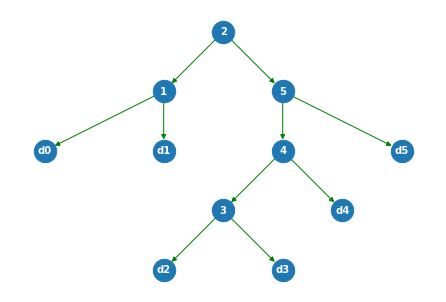

In [ ]:
keys = [1,2,3,4,5]
freq = [0,0.15,0.10,0.05,0.10,0.20]
dummies = [0.05,0.10,0.05,0.05,0.05,0.10]
n = len(freq)-1

optimalBST(keys,freq,dummies,n, True)

En este caso, al activar la opción **visualize**, se puede obsevar la disposición que deberían tener las claves dentro del árbol binario de búsqueda óptimo.

Se puede observar cómo efectivamente las claves ficticias denotadas con una "d" quedan en las hojas de este árbol, mientras que las otras claves son raíces de sub-árboles óptimos.

# 3. Propidades del algoritmo

## 3.1 Correctitud

### 3.1.1 Correctitud del algoritmo Bottom-up

**Sub-estructura óptima**

La sub-estructura óptima de este problema viene dada por la condición que cumplen todos los árboles binarios, la cual dice que para una raíz $k$, se generarán dos sub-árboles $T_1$ y $T_2$ cuyas claves serán menores y mayores que la raíz, respectivamente.

Sin embargo no se puede asegurar que las frecuencias sean menores, debido a que no siguen un orden específico, pero lo que sí se puede asegurar es que una vez que se escoge una raíz óptima $r$ con una probabilidad $p_r$, los sub-árboles $T_1$ y $T_2$ serán también deben ser árboles óptimos para sus respectivos conjuntos de claves y probabilidades.

Lo anterior se demuestra debido a la contradicción que generaría el que exista un sub-árbol llamado $T_1^*$ el cual tuviese un tiempo de búsqueda menor a $T_1$, esto significaría que el tiempo total del árbol principal sería menor al tiempo óptimo $T$, lo cual significaría que el algoritmo no funciona correctamente.

A continuación se muestra una ilustración de la sub-estructutra óptima.

<a href="https://imgur.com/K8PSsy1"><img src="https://i.imgur.com/K8PSsy1.jpg" title="source: imgur.com" /></a>

**Función recurrente**

En este sentido, utilizando lo explicado en el punto anterior, tenemos que la función recurrente para este problema es la siguiente:

\begin{equation}
e[i,j] = \begin{cases}
  q_{i-1}  & \text{si j = i-1} \\
  min(e[i,r-1] + e[r+1,j] + w(i,j)) & \text{si i}\leq{j}
\end{cases}
\end{equation}

Esta ecuación nos indica lo que hace el algoritmo en caso de que se quiera calcular el menor tiempo de búsqueda $e$ para un intervalo $[i,j]$.

* **Caso base**: en caso de que $j = i-1$, es decir, que el intervalo no tenga elementos, el costo máximo corresponderá a la probabilidad $q_{i-1}$ de nuestra lista de probabilidades de búsqueda fallida.

* **Resto de casos**: para el resto de intervalos, se deberá buscar el menor costo obtenido al utilizar una raíz $i \leq r \leq j$ y calcular los menores costos de los sub-árboles que se componen por las claves en los intervalos $[i,r-1]$  y  $[r+1,j]$. Esto sumado con la sumatoria de las probabilidades del conjunto $[p_i, p_j]$, la función que hace referencia a esto último es $w(i,j)$

Teniendo en cuenta estos dos componentes de función de recurrencia y subestructura óptima, podemos plantear la siguiente hipótesis de correctitud:

**Hipótesis**

El algoritmo Bottom-up para el problema de árbol binario de búsqueda óptimo retorna el mínimo coste de búsqueda para un conjunto $n$ de elementos con listas de recurrencia asociadas $p$ y $q$.

Para comprobar la hipótesis se utilizará inducción.

**Caso base**

Como se mencionó anteriormente, el caso base para este algoritmo es cuando el conjunto al cual se le quiere buscar el menor tiempo de búsqueda tiene 0 elementos dentro de este.

En este caso también se encontrará vacía la lista de probabilidades $p$, con lo cual solo dispondremos de un elemento en la lista de probabilidades de búsqueda fallida $q$ en la posición $i-1$, el cual será el elemento que se retornará.

**Paso inductivo**

Para el resto de casos, partimos desde la primicia que el algoritmo funciona correctamente para cualquier problema de tamaño menor a $n$, con lo cual cuando $i \leq j$, se aplicará el algoritmo para dos sub-árboles que tendrán a lo más un tamaño de $n-1$ elementos, por lo cual el algoritmo funcionaría correctamente. Además se utilizará la función $w(i,j)$ la cual es una sumatoria de correctitud comprobable trivialmente.

El problema que se resuelve en la última iteración del algoritmo es el cual considera una lista de elementos de tamaño $n$, con probabilidades $p$ y $q$, con lo cual tenemos que el algoritmo Bottom-up, irá probando las distintas raíces posibles desde $1$ hasta $n$, y consultará a los costes mínimos ya calculados anteriormente para los intervalos $[i,r-1]$ y $[r+1, j]$, con lo cual la solución a la cual se llegará será en efecto la solución final.

## 3.2 Tiempo de ejecución de algoritmo Bottom-up

Con respecto a la cantidad de subproblemas del algoritmo, esta viene dada por $O(n^2)$, debido a que por cada cantidad $n$ de claves a ordenar, existen $n$ formas de llegar a una solución óptima de cada subproblema.

Por su parte, cada subproblema toma una cantidad de tiempo $n$ de resolverse, debido a que se deben evaluar las posibles elecciones de raíz para cada sub-árbol.

Finalmente, tenemos que el tiempo de ejecución del algoritmo se consigue multiplicando la cantidad de subproblemas, por el tiempo que toma cada uno, todo esto sumado a la complejidad del postprocesamiento, el cual es constante debido a que solamente se debe realizar una comparación y asignar valores, con lo cual tenemos que el tiempo de ejecución total del algoritmo es:

$O(n^2) * O(n) + O(1) = O(n^3)$


## 3.3 Complejidad espacial del algoritmo Bottom-up



La complejidad espacial del algoritmo viene dada por las matrices auxiliares que se utilizan para guardar los costes óptimos anteriormente calculados y las sumas de probabilidades anteriormente calculadas. Con lo cual la complejidad espacial del algoritmo es:

$2O(n^2) = O(n^2)$

# 4. Experimentos

## 4.1 Comparación entre alternativas

En el siguiente experimento se ilustrará cómo se comportan los tiempos de ejecución de cada alternativa del algoritmo (recursiva/bottom-up), a medida que el tamaño del problema crece.

### Tiempo de ejecución de Bottom-up

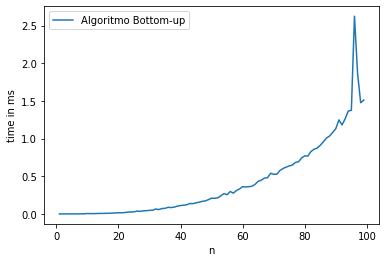

In [116]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias

    return keys, p, q

x = []; y1 = [] ; y2 = []

for n in range(1,100):

  keys, p, q = optimal_bst_instance_generator(n)
  largo = len(p)-1

  t = repeat(setup="from __main__ import optimalBST", stmt=f"optimalBST({keys}, {p}, {q}, {largo})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Tiempo de ejecución opción recursiva

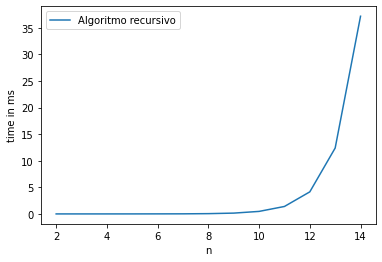

In [106]:
x = []; y1 = [] ; y2 = []

for n in range(2,15):

  keys, p, q = optimal_bst_instance_generator(n)
  largo = len(p)-1

  t = repeat(setup="from __main__ import optCost", stmt=f"optCost({p}, {q}, {0}, {largo})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo recursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Conclusiones

Luego de analizar ambos gráficos, es importante prestar atención a la medida en la que están los tiempos de ejecución, mientras el algoritmo de programación dinámica tiene una medida de tiempo en números decimales en el eje y, siendo el tiempo más lento $2.0-3.0 [ms]$. Por otro lado el algoritmo recursivo va desde los $0 [ms]$ a los $35[ms]$ con un crecimiento muy pronunciado a partir del tamaño de problema número $13$.

Se puede observar también que el crecimiento de las gráficas es diferente, el del algoritmo bottom-up se condice con su complejidad temporal teórica cúbica. Mientras que el algoritmo recursivo se puede observar que tiene un crecimiento asociable a la exponencialidad.

Cabe destacar finalmente que al momento de generar los gráficos, Google Collab tardó menos de $50 [s]$ en generar el primer gráfico, y algo más de $2 [min]$ en generar el segundo, demostrando nuevamente la diferencia de complejidad temporal entre estas dos alternativas.

## 4.2 Comparación cuando se escoje clave con mayor probabilidad como raíz

Finalmente se compararán cómo se comporta cada algoritmo en términos de tiempo y resultado cuando no se prueban todas las opciones de raíces, sino que se elije la clave con mayor probabilidad asociada como raíz.

In [130]:
cont = 0

def optCost2(freq, dummies, i, j):
    global cont

    cont += 1
    # Caso base
    if j < i:     
        return dummies[i]

    # Suma de probabilidades y dummies
    fsum = Sum(freq, dummies, i, j)
     
    # Mínimo valor encontrado
    Min = 999999999999
     
    # Se prueba cada raíz posible, se calcula recursivamente el coste de cada sub-árbol
    # Se compara el coste encontrado con el valor mínimo encontrado
    # Se reemplaza en caso de ser encontrado

    raiz = 0

    r = freq.index(max(freq))
    cost = (optCost(freq, dummies, i, r - 1) + optCost(freq, dummies, r + 1, j))
    Min = cost
     
    # Retorna minimo coste encontrado
    return Min + fsum

keys = [1, 2, 3, 4, 5]
freq = [0.15, 0.10, 0.05, 0.10, 0.20]
dummies = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
n = len(freq)
print("El coste del árbol de búsqueda óptimo es:", optCost2(freq, dummies, 0, n-1))
print("Cantidad de llamadas recursivas: ", cont)

El coste del árbol de búsqueda óptimo es: 2.8500000000000005
Cantidad de llamadas recursivas:  83


In [123]:
def optimalBST2(keys,freq,dummies,n, visualize = False):
    subProblemas = 0

    e = np.zeros((n+1)**2).reshape(n+1,n+1)     # Matriz para guardar costes
    w = np.zeros((n+1)**2).reshape(n+1,n+1)     # Matriz para guardar sumatorias de probabilidades
    root = np.zeros((n+1)**2).reshape(n+1,n+1)  # Matriz para guardar raíces óptimas encontradas

    # Inicialización de matrices
    for i in range(n+1):
      # Se guardan las probabilidades dummie en los casos para 0 elementos
        e[i,i] = dummies[i]  
        w[i,i] = dummies[i]  
    for i in range(0,n):
      # Se guardan las raíces para los casos con de 0 elementos
        root[i,i] = i+1

    for l in range(1,n+1):
        subProblemas += 1
        for i in range(0, n-l+1):
            j = i+l
            w[i,j] = w[i,j-1] + freq[j] + dummies[j]

            r = freq.index(max(freq))-1
            coste = e[i, r] + e[r+1,j] +  w[i,j]
            subProblemas += 1           
            e[i, j] = coste
            root[i, j-1] = r+1

    root_pruned = np.delete(np.delete(root, n, 1), n, 0)        # Se elimina última fila y columna

    return e[0,n], subProblemas
    
    #print(newRoot)
    
    if(visualize == True):
      T = nx.DiGraph()

      generate_binary_tree(T, keys, root_pruned.astype(int), 0, n-1)

      pos = graphviz_layout(T, prog="dot")

      # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
      nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")

keys = [1,2,3,4,5]
freq = [0,0.15,0.10,0.05,0.10,0.20]
dummies = [0.05,0.10,0.05,0.05,0.05,0.10]
n = len(freq)-1

coste, subProblemas = optimalBST2(keys,freq,dummies,n)

print("El coste del árbol de búsqueda óptimo es:", coste)
print("Cantidad de subProblemas resueltos:", subProblemas)

El coste del árbol de búsqueda óptimo es: 1.8000000000000003
Cantidad de subProblemas resueltos: 20


### 4.2.1 Tiempo de opción Bottom-up

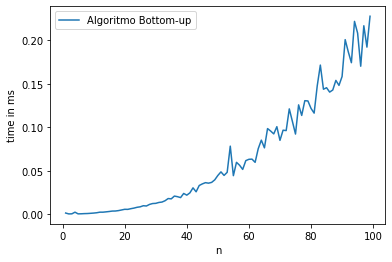

In [124]:
import matplotlib.pyplot as plt
import math

x = [n for n in range(0,10)] 
y1 = [(n-1) for n in range(0,10)] 

y = []

x = []; y1 = [] ; y2 = []

for n in range(1,100):

  keys, p, q = optimal_bst_instance_generator(n)
  largo = len(p)-1

  t = repeat(setup="from __main__ import optimalBST2", stmt=f"optimalBST2({keys}, {p}, {q}, {largo})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### 4.2.2 Tiempo de opción recursiva

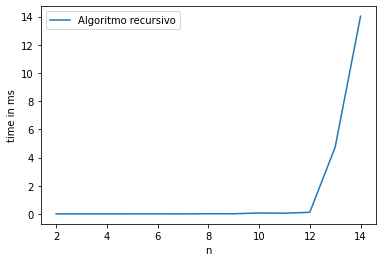

In [119]:
import matplotlib.pyplot as plt
import math

x = [n for n in range(0,10)] 
y1 = [(n-1) for n in range(0,10)] 

y = []

x = []; y1 = [] ; y2 = []

for n in range(2,15):

  keys, p, q = optimal_bst_instance_generator(n)
  largo = len(p)-1

  t = repeat(setup="from __main__ import optCost2", stmt=f"optCost2({p}, {q}, {0}, {largo})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo recursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Conclusiones

Luego de ejecutar ambos experimentos, se pueden obsevar dos cambios esenciales.

1. El tiempo de ejecución del algoritmo recursivo se reduce, pasa a demorarse practicamente la mitad de tiempo que en el caso anterior donde se probaban todas las opciones de raíz. Esto se puede explicar observando el contador de llamadas recursivas, al solamente elejir una opción, las llamadas necesarias para llegar a la solucion final son menos.

2. Para el algoritmo recursivo, vemos que su resultado obtenido no se aleja tanto del resultado real del problema, apenas se diferencian por una decima. Sin embargo para el algoritmo Bottom-up, la diferencia al solamente elegir el valor máximo y no probar el resto hace que el resultado final sea totalmente alejado del valor real. Esto es debido al paradigma de Bottom-up, a medida que se consigan las mejores soluciones posibles para los problemas menores, se llegará a la mejor solución posible para problemas mayores, esto quiere decir que si no se resuelve de manera correcta desde el inicio, el resto del desarrollo del problema estará también incorrecto.